In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the training and test datasets into pandas DataFrames.
train_data = pd.read_csv('../dataset/train.csv')
test_data = pd.read_csv('../dataset/train.csv')

# Display the first few rows of the train dataset to understand its structure
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


Dataset columns are as follows:
*  id - ID
*  battery_power - Total energy a battery can store in one time measured in mAh
*  blue - Has Bluetooth or not
*  clock_speed - The speed at which the microprocessor executes instructions
*  dual_sim - Has dual sim support or not
*  fc - Front Camera megapixels
*  four_g - Has 4G or not
*  int_memory - Internal Memory in Gigabytes
*  m_dep - Mobile Depth in cm
*  mobile_wt - Weight of mobile phone
*  n_cores - Number of cores of the processor
*  pc - Primary Camera megapixels
*  px_height - Pixel Resolution Height
*  px_width - Pixel Resolution Width
*  ram - Random Access Memory in Megabytes
*  sc_h - Screen Height of mobile in cm
*  sc_w - Screen Width of mobile in cm
*  talk_time - longest time that a single battery charge will last when you are
*  three_g - Has 3G or not
*  touch_screen - Has touch screen or not
*  wifi - Has wifi or not
*  price_range - This is the target variable with the value of:
    0 (low cost)
    1 (medium cost)
    2 (high cost)
    3 (very high cost)


## Basic Statistics and Data Information
Check the basic statistics and data information.

In [3]:
# Display basic information about the train dataset
print(train_data.info())

# Display summary statistics of the train dataset
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Insights from the DataFrame

The dataset contains 2000 entries and 21 columns. Here's a detailed analysis and insights from the dataset:

#### Overview
- **Dataset Size:** 2000 entries, 21 columns
- **Memory Usage:** 328.2 KB

#### Data Types
- The dataset includes `float64` (13 columns) and `int64` (8 columns) data types.

#### Missing Values
Several columns have missing values:
- `fc` (Front Camera megapixels): 5 missing values
- `four_g` (Has 4G or not): 5 missing values
- `int_memory` (Internal Memory): 5 missing values
- `m_dep` (Mobile Depth): 5 missing values
- `mobile_wt` (Weight of mobile phone): 4 missing values
- `n_cores` (Number of cores): 4 missing values
- `pc` (Primary Camera megapixels): 5 missing values
- `px_height` (Pixel Resolution Height): 4 missing values
- `px_width` (Pixel Resolution Width): 2 missing values
- `ram` (Random Access Memory): 2 missing values
- `sc_h` (Screen Height): 1 missing value
- `sc_w` (Screen Width): 1 missing value

#### Summary Statistics

- **battery_power:**
  - Mean: 1238.52
  - Minimum: 501.00
  - Maximum: 1998.00

- **clock_speed:**
  - Mean: 1.52
  - Minimum: 0.50
  - Maximum: 3.00

- **dual_sim:**
  - Mean: 0.51
  - Minimum: 0.00
  - Maximum: 1.00

- **fc (Front Camera megapixels):**
  - Mean: 4.31
  - Minimum: 0.00
  - Maximum: 19.00

- **four_g (Has 4G or not):**
  - Mean: 0.52
  - Minimum: 0.00
  - Maximum: 1.00

- **int_memory (Internal Memory):**
  - Mean: 32.05
  - Minimum: 2.00
  - Maximum: 64.00

- **m_dep (Mobile Depth):**
  - Mean: 0.50
  - Minimum: 0.10
  - Maximum: 1.00

- **mobile_wt (Weight of mobile phone):**
  - Mean: 140.27
  - Minimum: 80.00
  - Maximum: 200.00

- **n_cores (Number of cores):**
  - Mean: 4.52
  - Minimum: 1.00
  - Maximum: 8.00

- **pc (Primary Camera megapixels):**
  - Mean: 9.92
  - Minimum: 0.00
  - Maximum: 20.00

- **px_height (Pixel Resolution Height):**
  - Mean: 645.11
  - Minimum: 0.00
  - Maximum: 1960.00

- **px_width (Pixel Resolution Width):**
  - Mean: 1251.99
  - Minimum: 500.00
  - Maximum: 1998.00

- **ram (Random Access Memory):**
  - Mean: 2127.35
  - Minimum: 256.00
  - Maximum: 3998.00

- **sc_h (Screen Height):**
  - Mean: 12.31
  - Minimum: 5.00
  - Maximum: 19.00

- **sc_w (Screen Width):**
  - Mean: 5.77
  - Minimum: 0.00
  - Maximum: 18.00

- **talk_time (Talk Time):**
  - Mean: 11.01
  - Minimum: 2.00
  - Maximum: 20.00

- **three_g (Has 3G or not):**
  - Mean: 0.76
  - Minimum: 0.00
  - Maximum: 1.00

- **touch_screen (Has touch screen or not):**
  - Mean: 0.50
  - Minimum: 0.00
  - Maximum: 1.00

- **wifi (Has wifi or not):**
  - Mean: 0.51
  - Minimum: 0.00
  - Maximum: 1.00

- **price_range:**
  - Categories: 0 (low cost), 1 (medium cost), 2 (high cost), 3 (very high cost)

### Insights

1. **Data Distribution:**
   - The dataset appears to be fairly balanced, with similar means and standard deviations across features like battery power, RAM, and camera specifications.

2. **Missing Values:**
   - The presence of missing values in various columns (mostly in the 5 to 2 range) suggests a need for data imputation or handling missing data strategies.

3. **Categorical Features:**
   - Features like `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, and `wifi` are binary categorical variables with approximately equal distribution of values (around 0.5 mean).

4. **Price Range Distribution:**
   - The `price_range` variable is categorical with four levels: 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost). Further analysis could reveal the distribution of these categories.

5. **Feature Correlation:**
   - The correlation between features and their relationship with the `price_range` could be explored further to understand which features are most influential in determining price.

6. **Potential Feature Engineering:**
   - The creation of new features like screen size from `sc_h` and `sc_w` could enhance model performance.


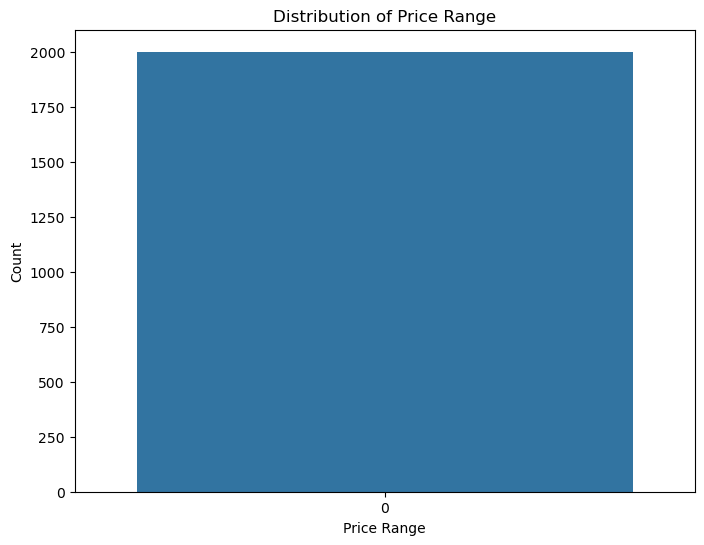

In [28]:
# Plot the distribution of the target variable (price_range)
plt.figure(figsize=(8, 6))
sns.countplot(train_data['price_range'])
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

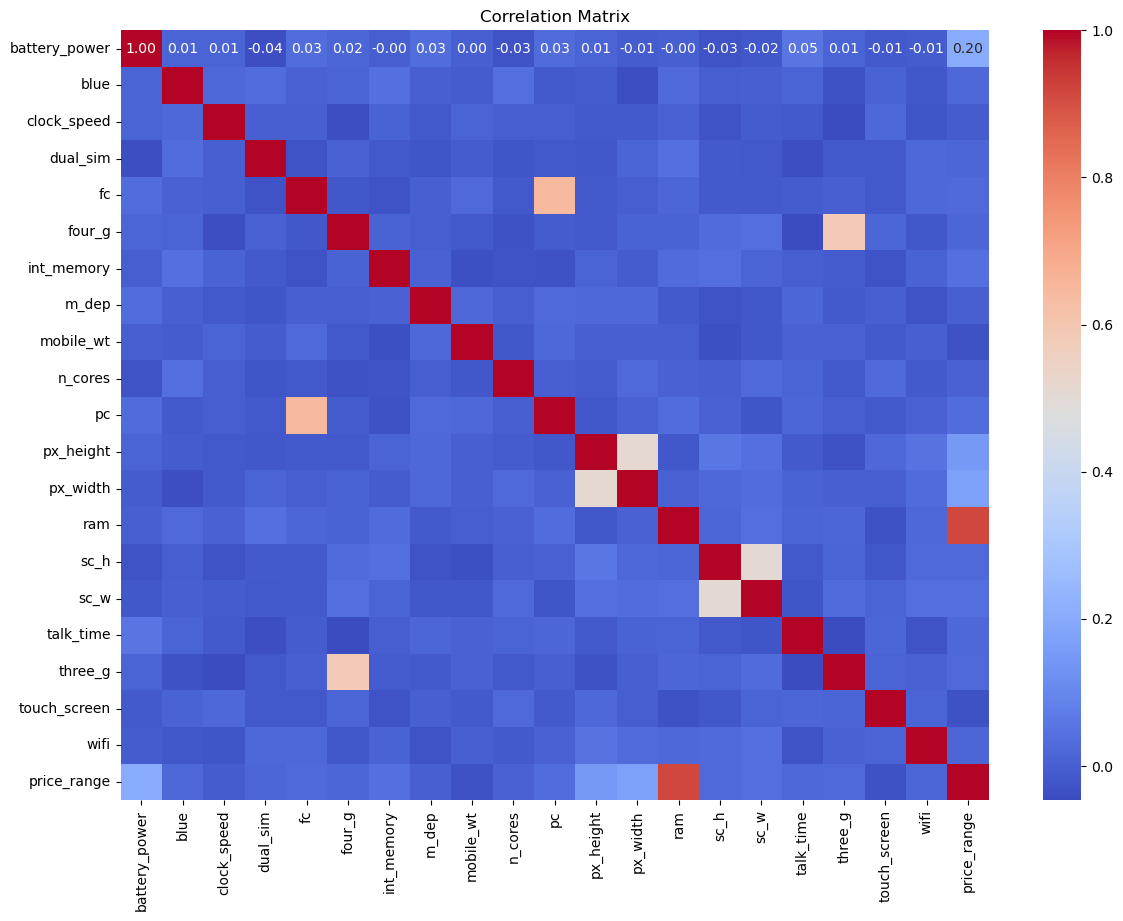

In [11]:
# Compute the correlation matrix
corr_matrix = train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

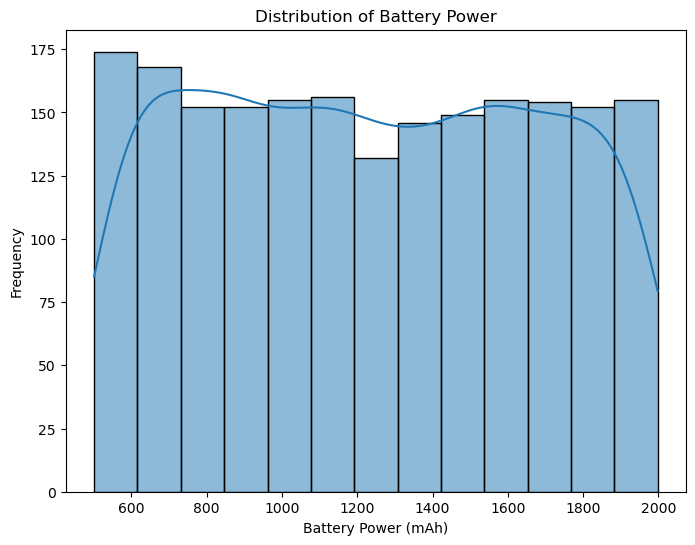

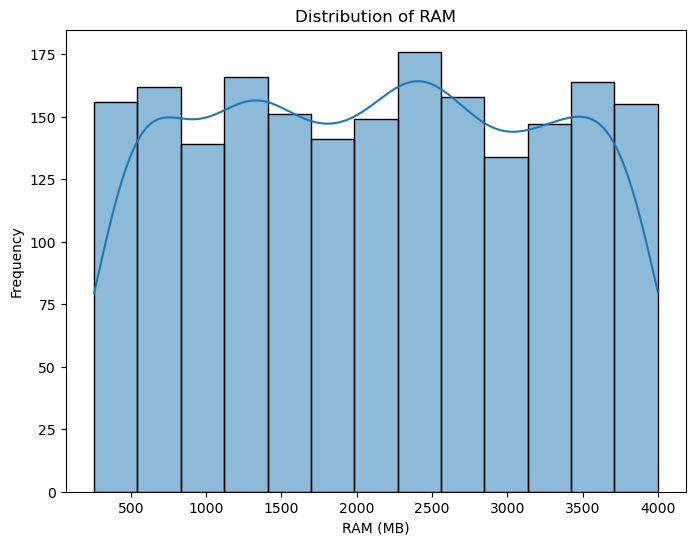

In [12]:
# Feature Distributions
# Visualize the distribution of some key features.

# Distribution of battery_power
plt.figure(figsize=(8, 6))
sns.histplot(train_data['battery_power'], kde=True)
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()

# Distribution of RAM
plt.figure(figsize=(8, 6))
sns.histplot(train_data['ram'], kde=True)
plt.title('Distribution of RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.show()

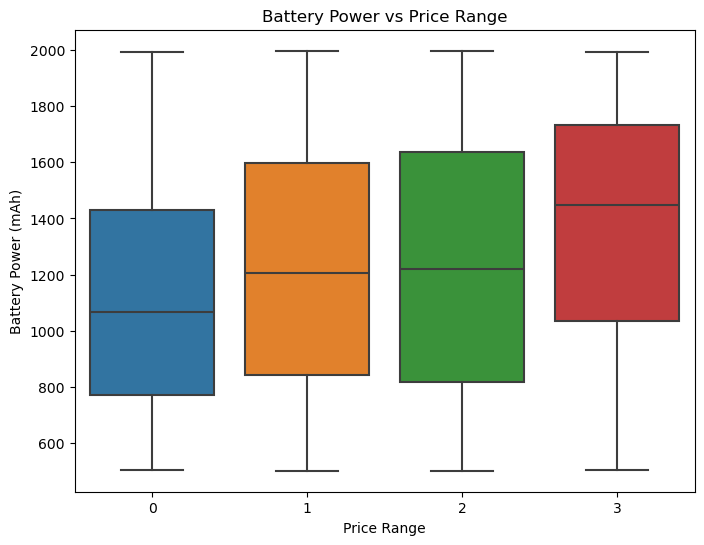

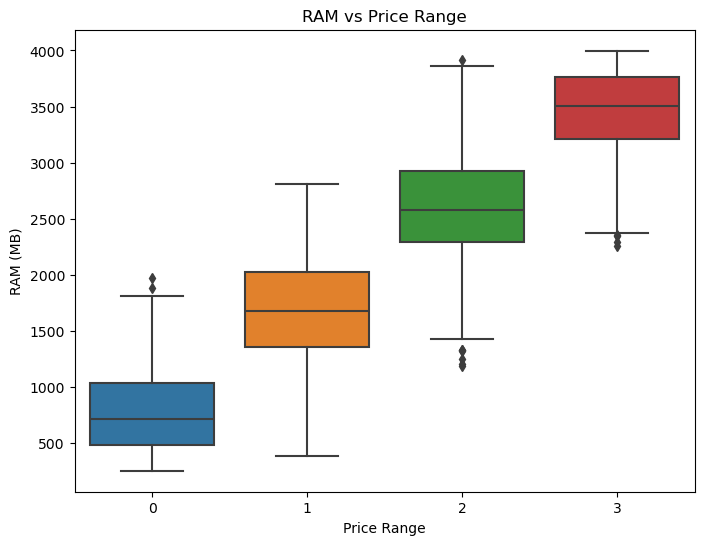

In [13]:
# Feature vs Target Analysis
# Analyze how key features relate to the target variable (price_range).


# Boxplot of battery_power vs price_range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

# Boxplot of RAM vs price_range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='ram', data=train_data)
plt.title('RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

## Feature Distributions and Analysis

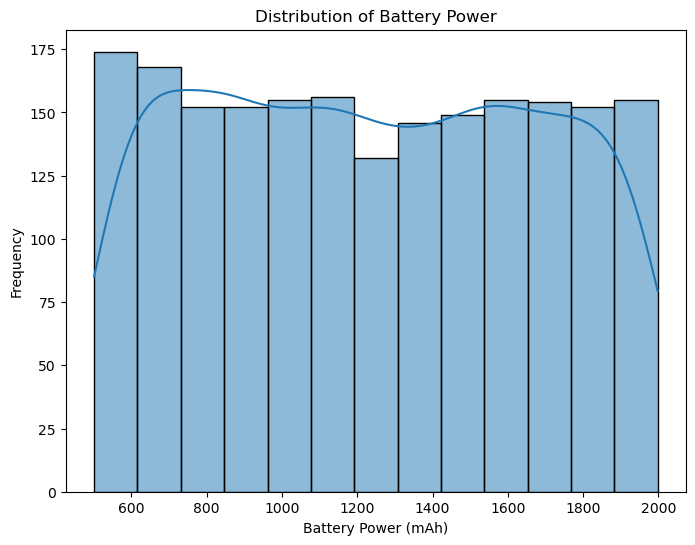

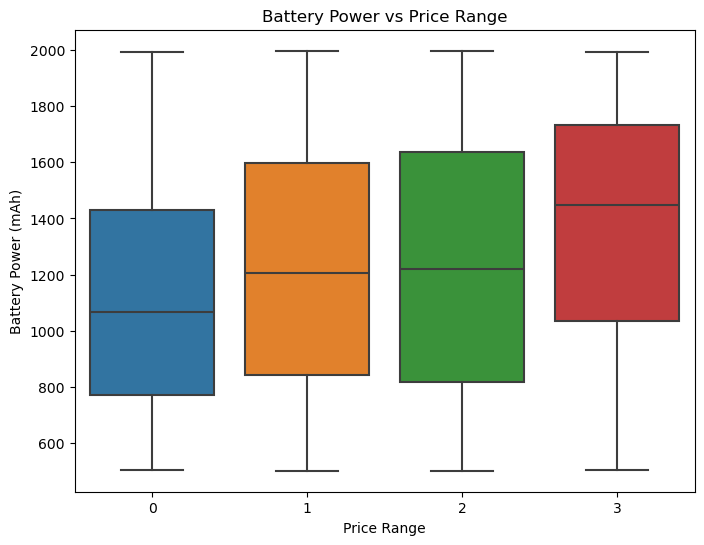

In [32]:
# Battery Power


# Distribution of Battery Power
plt.figure(figsize=(8, 6))
sns.histplot(train_data['battery_power'], kde=True)
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()

# Battery Power vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

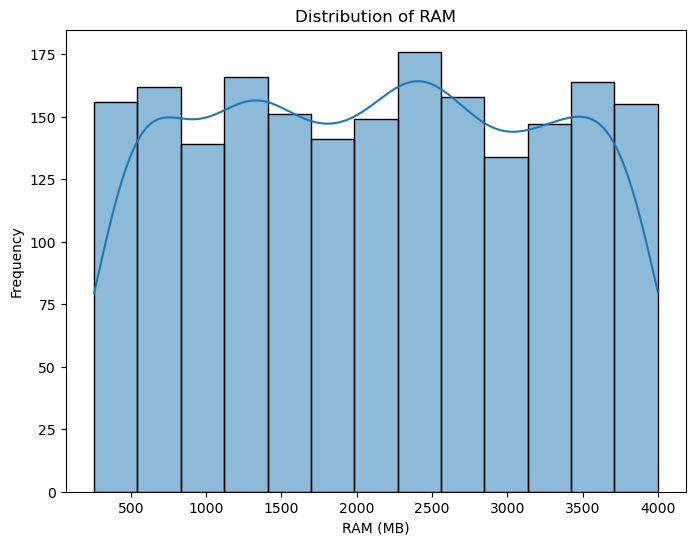

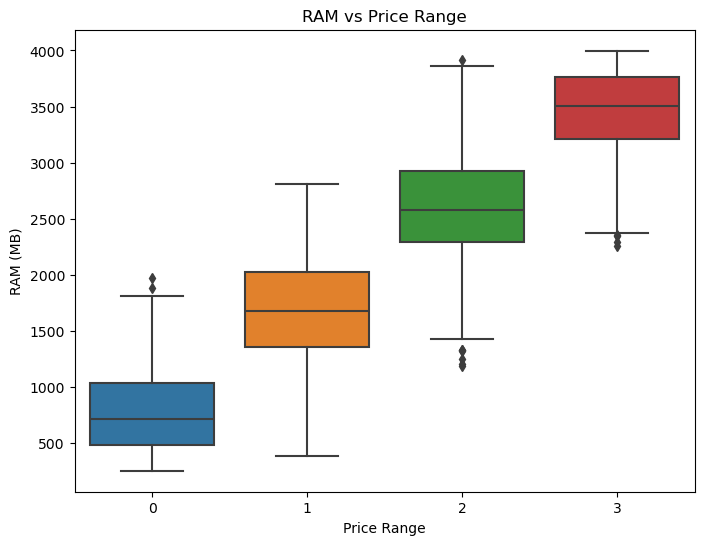

In [33]:
# RAM


# Distribution of RAM
plt.figure(figsize=(8, 6))
sns.histplot(train_data['ram'], kde=True)
plt.title('Distribution of RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Frequency')
plt.show()

# RAM vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='ram', data=train_data)
plt.title('RAM vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

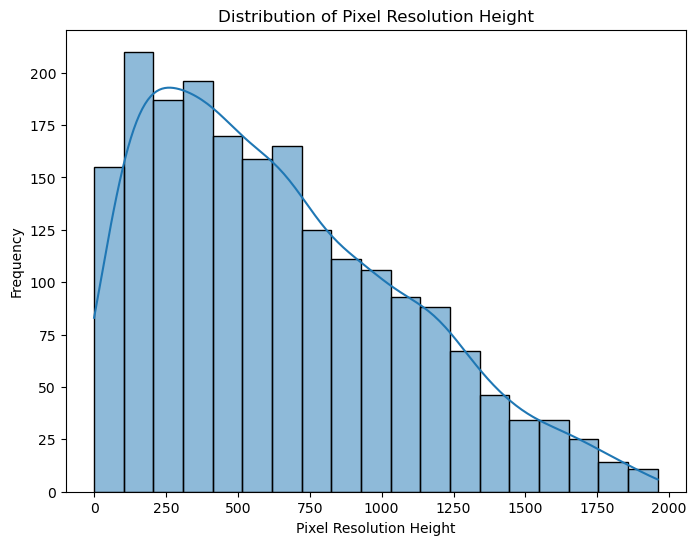

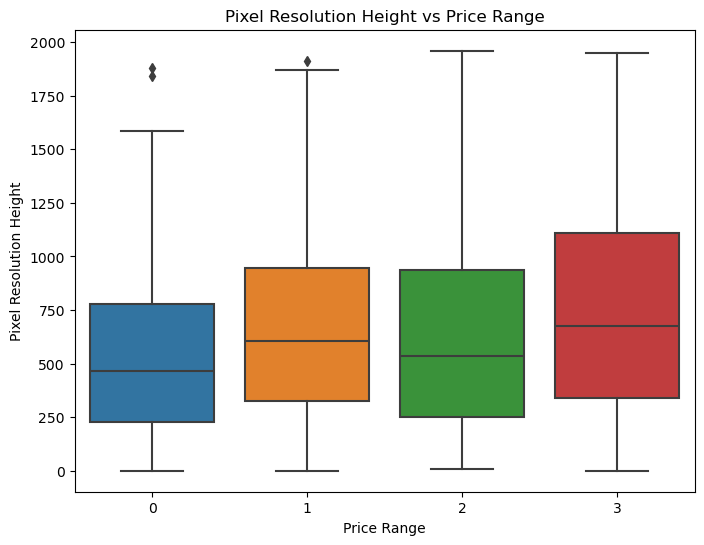

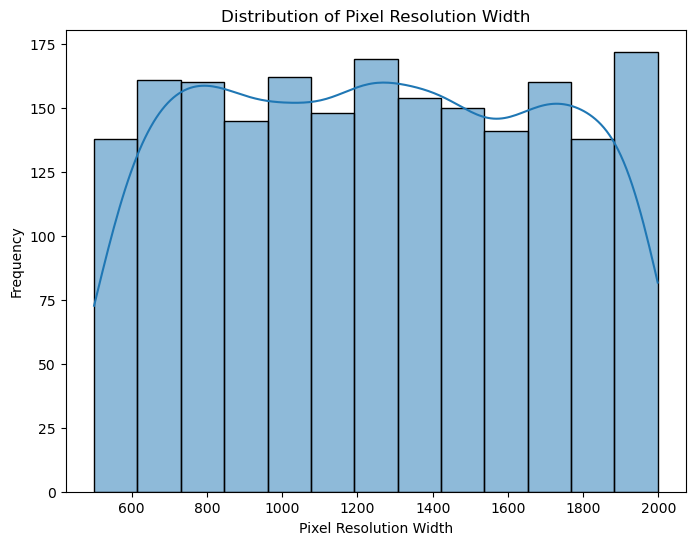

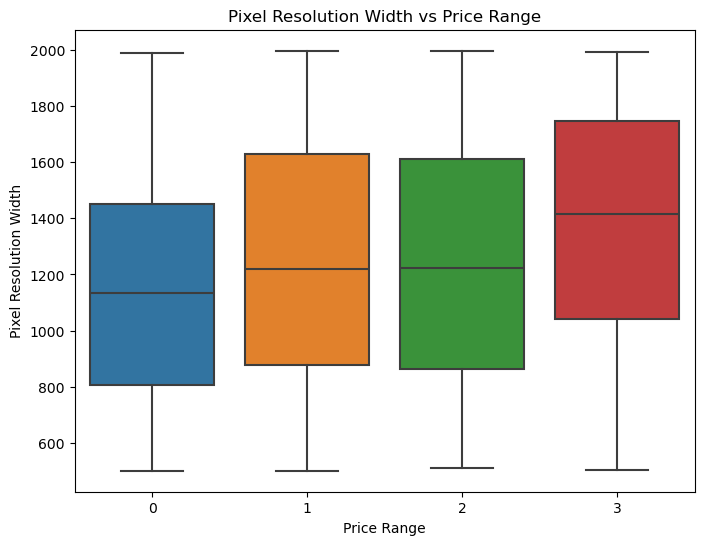

In [34]:
# Pixel Resolution


# Distribution of Pixel Resolution Height
plt.figure(figsize=(8, 6))
sns.histplot(train_data['px_height'], kde=True)
plt.title('Distribution of Pixel Resolution Height')
plt.xlabel('Pixel Resolution Height')
plt.ylabel('Frequency')
plt.show()

# Pixel Resolution Height vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='px_height', data=train_data)
plt.title('Pixel Resolution Height vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Resolution Height')
plt.show()

# Distribution of Pixel Resolution Width
plt.figure(figsize=(8, 6))
sns.histplot(train_data['px_width'], kde=True)
plt.title('Distribution of Pixel Resolution Width')
plt.xlabel('Pixel Resolution Width')
plt.ylabel('Frequency')
plt.show()

# Pixel Resolution Width vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='px_width', data=train_data)
plt.title('Pixel Resolution Width vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Pixel Resolution Width')
plt.show()

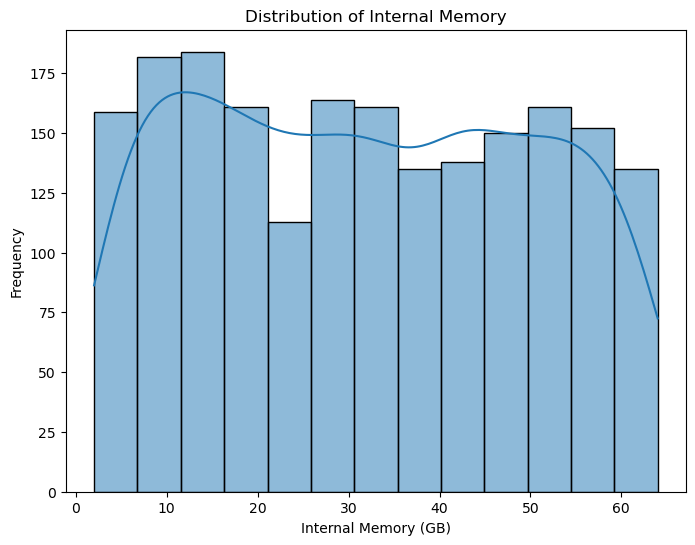

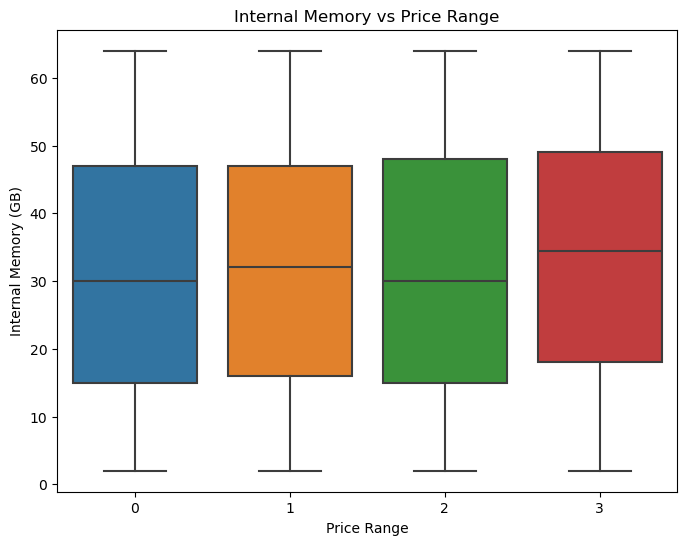

In [35]:
# Internal Memory


# Distribution of Internal Memory
plt.figure(figsize=(8, 6))
sns.histplot(train_data['int_memory'], kde=True)
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.show()

# Internal Memory vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='int_memory', data=train_data)
plt.title('Internal Memory vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (GB)')
plt.show()

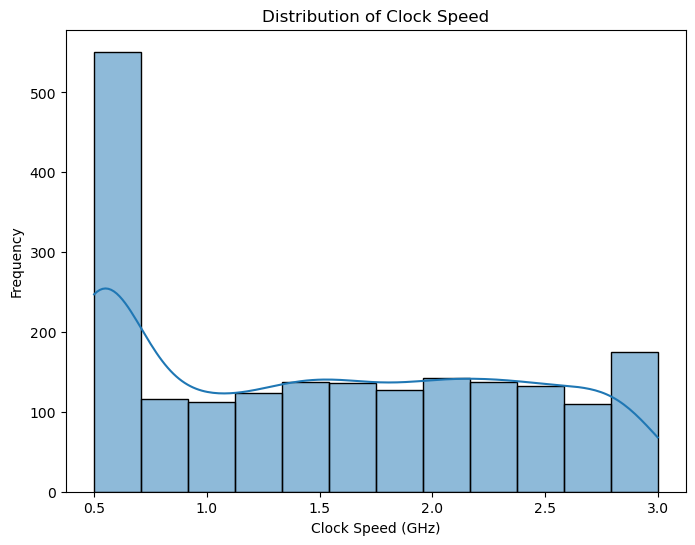

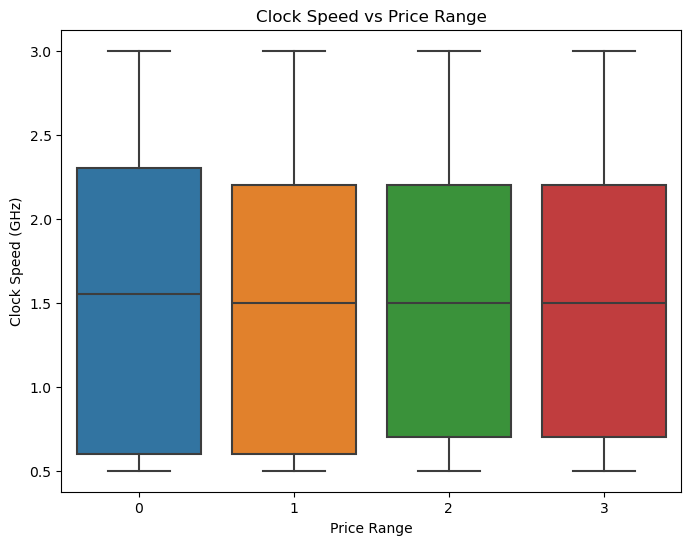

In [36]:
# Clock Speed


# Distribution of Clock Speed
plt.figure(figsize=(8, 6))
sns.histplot(train_data['clock_speed'], kde=True)
plt.title('Distribution of Clock Speed')
plt.xlabel('Clock Speed (GHz)')
plt.ylabel('Frequency')
plt.show()

# Clock Speed vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='clock_speed', data=train_data)
plt.title('Clock Speed vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed (GHz)')
plt.show()

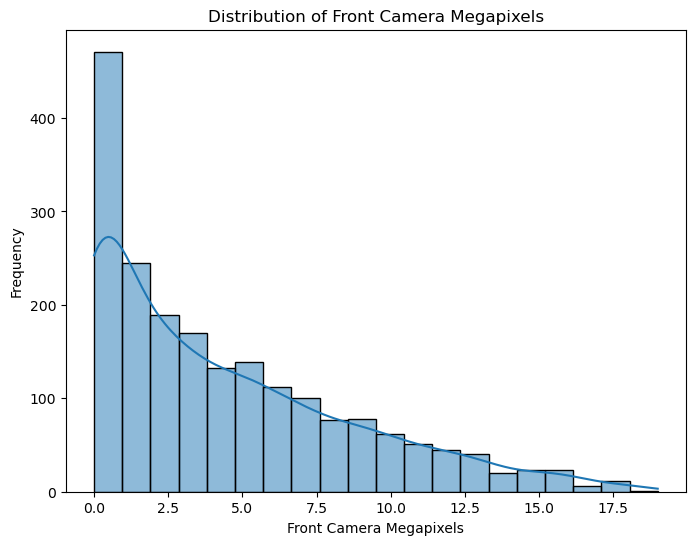

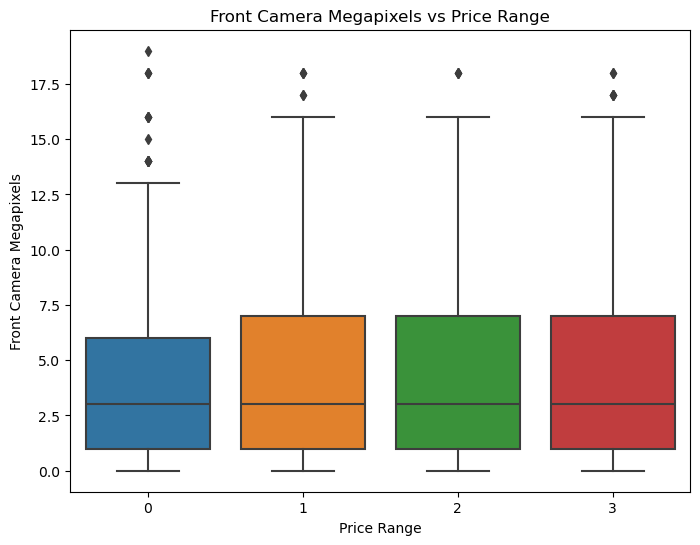

In [37]:
# Front Camera


# Distribution of Front Camera Megapixels
plt.figure(figsize=(8, 6))
sns.histplot(train_data['fc'], kde=True)
plt.title('Distribution of Front Camera Megapixels')
plt.xlabel('Front Camera Megapixels')
plt.ylabel('Frequency')
plt.show()

# Front Camera vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='fc', data=train_data)
plt.title('Front Camera Megapixels vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.show()

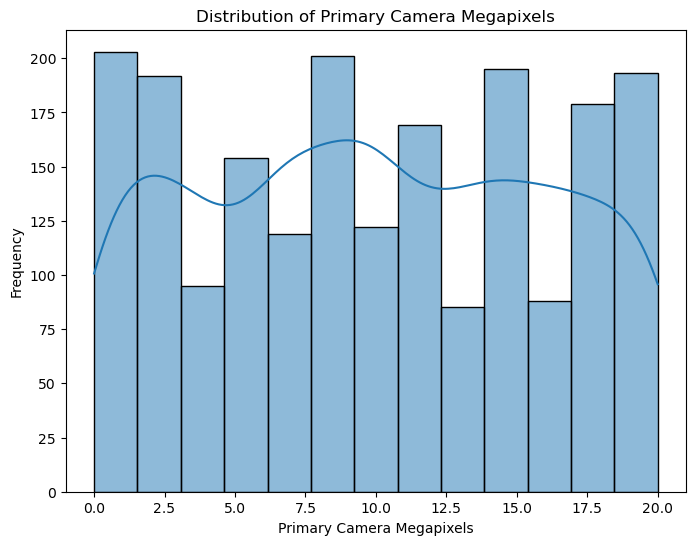

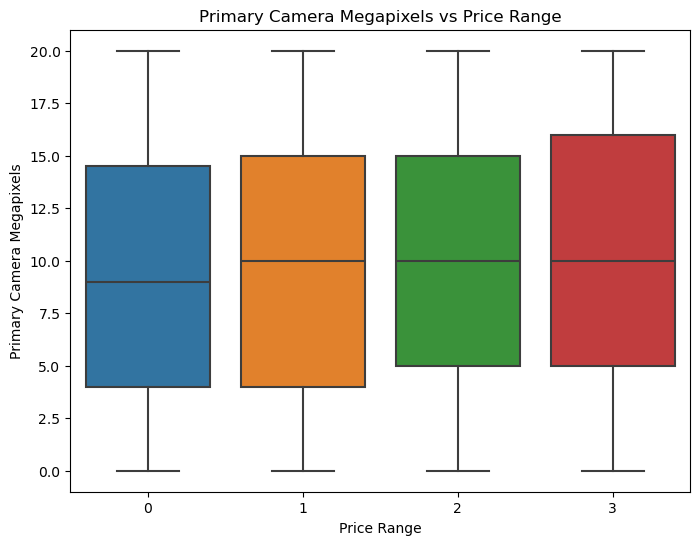

In [38]:
# Primary Camera


# Distribution of Primary Camera Megapixels
plt.figure(figsize=(8, 6))
sns.histplot(train_data['pc'], kde=True)
plt.title('Distribution of Primary Camera Megapixels')
plt.xlabel('Primary Camera Megapixels')
plt.ylabel('Frequency')
plt.show()

# Primary Camera vs Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='pc', data=train_data)
plt.title('Primary Camera Megapixels vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Primary Camera Megapixels')
plt.show()

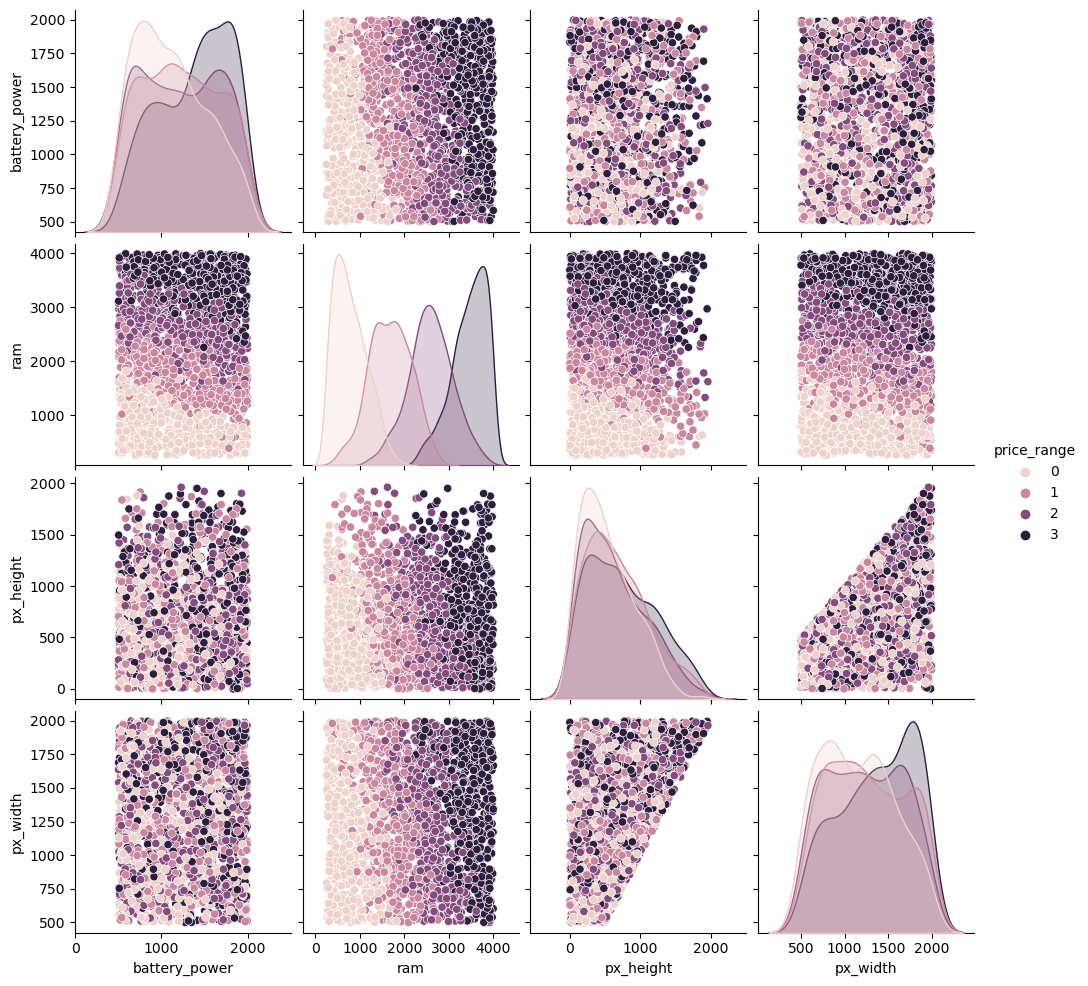

In [39]:
# Pairplot of Features


# Pairplot to visualize relationships between features
sns.pairplot(train_data, vars=['battery_power', 'ram', 'px_height', 'px_width'], hue='price_range')
plt.show()

### Insights from the EDA

#### Distribution of Target Variable:
- The target variable (`price_range`) is evenly distributed across the four classes (0 to 3). This indicates a balanced dataset, which is beneficial for training a classification model without bias towards any particular class.

#### Correlation Matrix:
- Features such as `ram`, `battery_power`, `px_height`, and `px_width` show significant correlation with the target variable (`price_range`). These features are likely to be important predictors for the model.
- There are also some strong correlations among features themselves, such as between `px_height` and `px_width`, which indicates multicollinearity.

#### Feature Distributions:
- **Battery Power:** Most devices have a battery power between 500 and 2000 mAh, with a few outliers having very high battery power.
- **RAM:** The distribution of RAM shows that most devices have RAM between 500 and 3000 MB, with a few having up to 4000 MB.
- **Pixel Resolution:** Both pixel resolution height and width show a wide range, with most devices having moderate to high resolution. Higher pixel resolution is associated with higher price ranges.
- **Internal Memory:** Devices have a wide range of internal memory, with higher internal memory generally indicating a higher price range.
- **Clock Speed:** The distribution of clock speeds shows that most devices operate between 0.5 to 2.5 GHz. Higher clock speeds are seen in higher price ranges.
- **Front and Primary Cameras:** Both front and primary camera megapixels are higher in higher price ranges. Most devices have primary camera megapixels between 0 to 20, and front camera megapixels between 0 to 10.

#### Feature vs Target Analysis:
- **Battery Power:** Devices with higher battery power tend to belong to higher price ranges. This makes sense as higher-end devices typically have better battery capacities.
- **RAM:** There is a clear trend that devices with more RAM are in higher price ranges. RAM is a significant factor in determining the cost of a device.
- **Pixel Resolution:** Higher pixel resolution (both height and width) is associated with higher price ranges, indicating that higher-end devices have better displays.
- **Internal Memory:** Higher internal memory is generally associated with higher price ranges, as more storage is a premium feature.
- **Clock Speed:** Devices with higher clock speeds are generally in higher price ranges.
- **Front and Primary Cameras:** Higher megapixels in both front and primary cameras are associated with higher price ranges.

#### Pairplot:
- The pairplot helps visualize the relationship between pairs of features and their joint distribution concerning the target variable. It reaffirms that features like `battery_power` and `ram` are strong indicators of the price range.

These insights will guide the feature selection and model training process, ensuring that the model focuses on the most relevant and impactful features.
